In [37]:
import pandas as pd
data = pd.read_csv('national_tes.csv')

In [38]:
print(data)

print()


               GEOID      place    state state_abbr                  county  \
0        20200001011  Anchorage   Alaska         AK  Anchorage Municipality   
1        20200001012  Anchorage   Alaska         AK  Anchorage Municipality   
2        20200001021  Anchorage   Alaska         AK  Anchorage Municipality   
3        20200001022  Anchorage   Alaska         AK  Anchorage Municipality   
4        20200001023  Anchorage   Alaska         AK  Anchorage Municipality   
...              ...        ...      ...        ...                     ...   
197500  560430003011    Worland  Wyoming         WY         Washakie County   
197501  560430003012    Worland  Wyoming         WY         Washakie County   
197502  560430003013    Worland  Wyoming         WY         Washakie County   
197503  560430003021    Worland  Wyoming         WY         Washakie County   
197504  560430003022    Worland  Wyoming         WY         Washakie County   

                        ua_name  ua_pop            

In [39]:
merged = pd.read_csv('merged.csv')

In [40]:
print(merged.columns)

Index(['City', 'State', 'Year', 'Max AQI', 'ua_pop', 'tc_goal', 'treecanopy',
       'tc_gap', 'priority_i', 'pctpocnorm', 'pctpovnorm', 'unemplnorm',
       'dep_perc', 'depratnorm', 'lingnorm', 'health_nor', 'temp_norm',
       'tesctyscor', 'child_perc', 'seniorperc', 'land_area', 'biome'],
      dtype='object')


In [41]:
print(merged)

             City      State  Year  Max AQI    ua_pop   tc_goal  treecanopy  \
0      Birmingham    Alabama  2018     42.0  776256.0  0.473593         NaN   
1      Birmingham    Alabama  2018     46.0  776256.0  0.473593         NaN   
2      Birmingham    Alabama  2018     36.0  776256.0  0.473593         NaN   
3      Birmingham    Alabama  2018     40.0  776256.0  0.473593         NaN   
4      Birmingham    Alabama  2018     49.0  776256.0  0.473593         NaN   
...           ...        ...   ...      ...       ...       ...         ...   
88365     Memphis  Tennessee  2021     48.0  872149.0  0.473962         NaN   
88366     Memphis  Tennessee  2021     61.0  872149.0  0.473962         NaN   
88367     Memphis  Tennessee  2021    150.0  872149.0  0.473962         NaN   
88368     Memphis  Tennessee  2021     71.0  872149.0  0.473962         NaN   
88369     Memphis  Tennessee  2021     49.0  872149.0  0.473962         NaN   

       tc_gap  priority_i  pctpocnorm  ...  dep_per

In [42]:
df = merged.drop(['treecanopy', 'tc_gap'], axis = 1)


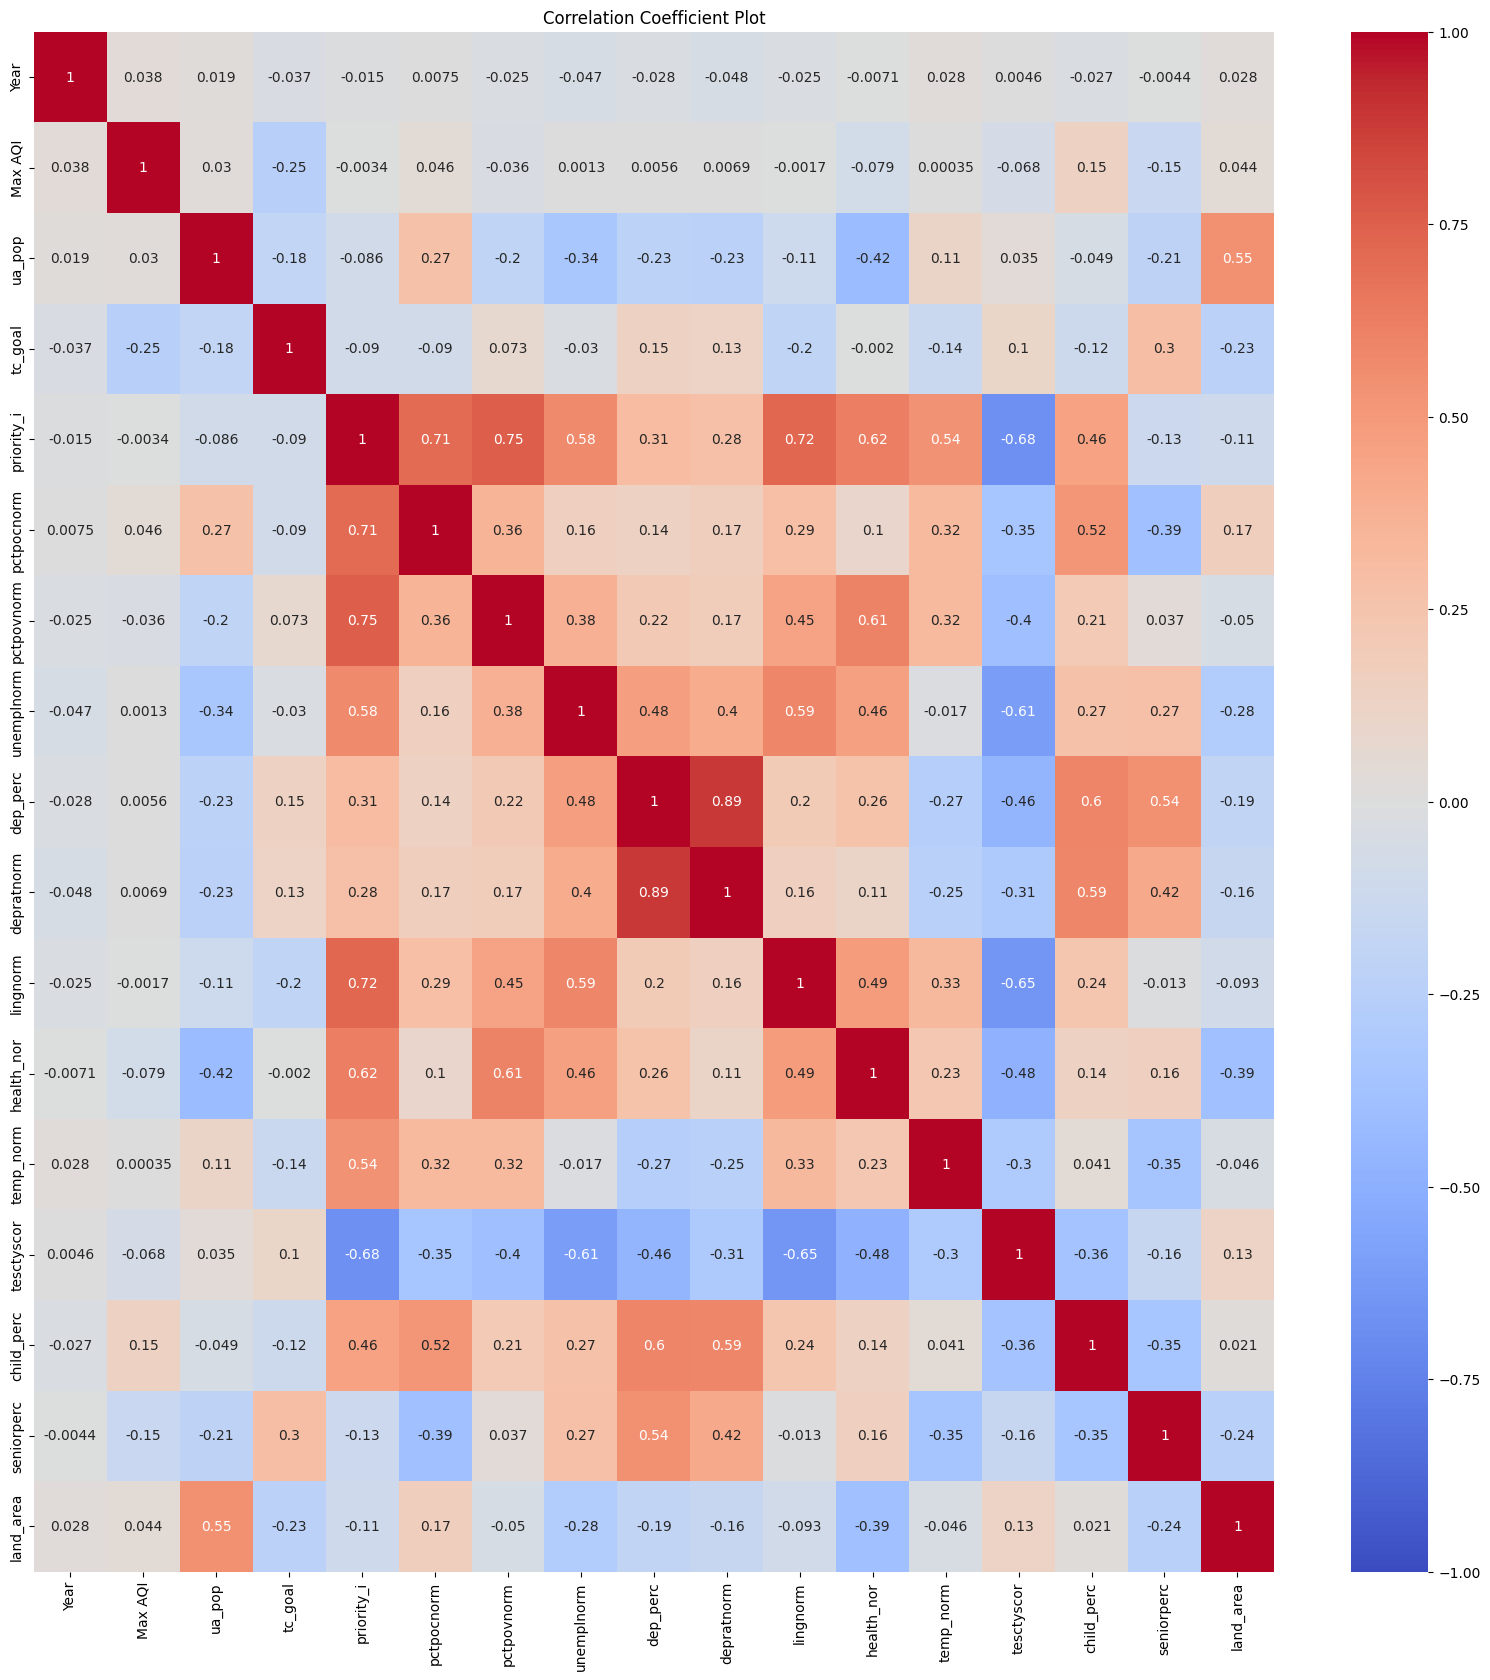

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

# Show the plot
plt.title("Correlation Coefficient Plot")
plt.show()

In [44]:
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X, y = df.drop('Max AQI', axis=1) , df['Max AQI']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)



In [45]:
encoding_map = X_train.join(y_train).groupby('City')['Max AQI'].mean().to_dict()
X_train['City'] = X_train['City'].map(encoding_map)
X_test['City'] = X_test['City'].map(encoding_map)
encoding_map = X_train.join(y_train).groupby('State')['Max AQI'].mean().to_dict()
X_train['State'] = X_train['State'].map(encoding_map)
X_test['State'] = X_test['State'].map(encoding_map)
encoding_map = X_train.join(y_train).groupby('biome')['Max AQI'].mean().to_dict()
X_train['biome'] = X_train['biome'].map(encoding_map)
X_test['biome'] = X_test['State'].map(encoding_map)

In [46]:
nan_counts = X_train.isna().sum()

#print(nan_counts)
infinity_mask = np.isinf(X_train)
has_infinity = infinity_mask.any()

print(has_infinity)

City          False
State         False
Year          False
ua_pop        False
tc_goal       False
priority_i    False
pctpocnorm    False
pctpovnorm    False
unemplnorm    False
dep_perc      False
depratnorm    False
lingnorm      False
health_nor    False
temp_norm     False
tesctyscor    False
child_perc    False
seniorperc    False
land_area     False
biome         False
dtype: bool


In [47]:
print(X_train)

            City      State  Year        ua_pop   tc_goal  priority_i  \
16125  42.304376  41.045840  2018  1.223558e+07  0.282000    0.427258   
42409  37.359375  38.253681  2019  1.958685e+06  0.481818    0.417424   
4051   51.148278  49.169190  2021  3.747474e+06  0.150000    0.398653   
41471  39.174713  38.253681  2019  2.211787e+06  0.478571    0.373118   
78358  47.019657  47.749888  2019  1.172766e+06  0.150000    0.382539   
...          ...        ...   ...           ...       ...         ...   
6265   33.727451  33.727451  2020  4.618640e+05  0.489091    0.457301   
54886  47.456216  47.456216  2018  7.697370e+05  0.150000    0.419484   
76820  50.635960  47.749888  2019  1.176474e+06  0.150000    0.412480   
860    38.683824  38.683824  2021  7.762560e+05  0.473593    0.475231   
15795  42.304376  41.045840  2018  1.223558e+07  0.282000    0.427258   

       pctpocnorm  pctpovnorm  unemplnorm  dep_perc  depratnorm  lingnorm  \
16125    0.690149    0.341422    0.131577  0.3

In [48]:
# Train a model
clf = XGBRegressor(random_state=42)
clf.fit(X_train, y_train)

# Compute permutation feature importance
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)

# Display the feature importances
for i, imp in enumerate(result.importances_mean):
    print(f"Feature {i} - Importance: {imp}")

Feature 0 - Importance: 0.3503423440332447
Feature 1 - Importance: 0.0038529206993757874
Feature 2 - Importance: 0.04044476048719086
Feature 3 - Importance: 0.001028659700173747
Feature 4 - Importance: 0.0002681362193370525
Feature 5 - Importance: -0.0002426945691282434
Feature 6 - Importance: 0.0006432678907240715
Feature 7 - Importance: 0.0027903730837828006
Feature 8 - Importance: -0.00027739168304056577
Feature 9 - Importance: 6.881773518960429e-05
Feature 10 - Importance: 0.0003504844621875428
Feature 11 - Importance: -4.7021277729708544e-05
Feature 12 - Importance: 0.0002479973755488215
Feature 13 - Importance: -8.293217663840983e-05
Feature 14 - Importance: -0.00019542194464640858
Feature 15 - Importance: -0.0003649595574341265
Feature 16 - Importance: -0.00027433426042843266
Feature 17 - Importance: 0.00028373759179231757
Feature 18 - Importance: 0.0


In [51]:
y_pred = clf.predict(X_test)
print(y_pred)

[33.577305 56.244457 41.461685 ... 62.416927 32.36421  52.388668]


In [53]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)

print(score)

0.18782158896030143
